In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Code for fetching the Top 10 Selling Categories

In [2]:
# Check if Oracle instant client is installed - 32 or 64 bit based on sys config
# Include the path of instant client in path environmental variable.
# Ensure python is also same 32 or 64 bit. Install cx_Oracle library
#Then connect to the Oracle database


import cx_Oracle
ip = 'reade.forest.usf.edu'
port = 1521
SID = 'cdb9'
dsn_tns = cx_Oracle.makedsn(ip, port, SID)
d = cx_Oracle.connect('db509','db5pass',dsn_tns)
f = d.cursor()

# query for fetching the categories and their count
e =f.execute("SELECT c.DESCRIPTION, count(*) FROM "   
             "order_items o inner join products p  ON o.product_id = p.product_id " 
             "inner join category c  ON p.category_id = c.category_id " 
             "group by c.DESCRIPTION")
ROWS = e.fetchall()


In [ ]:
## Visualizing the top 5 most selling categories 

In [3]:
category_dict = {}
for i, row in enumerate(ROWS):
    category_dict[i] = list(row)
cat_df = pd.DataFrame(category_dict)
cat_df = cat_df.transpose()
cat_df.columns = ['category_name', 'count_of_orders']
cat_df.sort_values(by ='count_of_orders', ascending = False, inplace = True)
cat_df.head(10)


,category_name,count_of_orders
196,SHAMPOO,33
216,ALL OTHER SAUCES,29
18,FZ MEAT,29
69,PASTA,28
61,SYRUP/MOLASSES,28
34,AUTOMOBILE WAXES/POLISHES,28
26,SPIRITS/LIQUOR,27
143,PICKLES/RELISH - RFG,27
243,HAIR SPRAY/SPRITZ,26
287,CHARCOAL,26


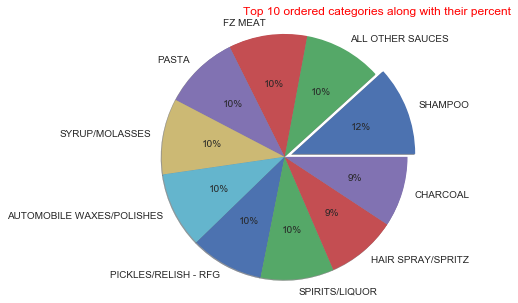

In [96]:
category_names =[]
category_percent = []
for cat_name, cat_price in zip(cat_df['category_name'].values[:10], cat_df['count_of_orders'].values[:10]):
    category_names.append(cat_name)
    category_percent.append(round((cat_price*100)/sum(cat_df['count_of_orders'].values[:10]), 2))
category_percent[9] = category_percent[9] +0.02
labels = category_names
fracs = category_percent
explode = (0.2, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
fig = plt.figure(figsize=(8,5))
plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True, startangle= 360, radius = 3)

plt.axis('equal')
plt.title("Top 10 ordered categories along with their percent", fontsize = 12, loc ='right', color ='red')

# Cities with Highest No of Orders

In [97]:
z =f.execute("select ship_city,count(*) from orders "
                "group by ship_city "
            "order by count(*) desc")
all_rows = z.fetchall()
city_dict = {}
for i, row in enumerate(all_rows):
    city_dict[i] = list(row)
city_df = pd.DataFrame(city_dict)
city_df = city_df.transpose()
city_df.columns = ['city_name', 'orders_count']
city_df.sort_values(by ='orders_count', ascending = False, inplace = True)
city_df.head(10)


,city_name,orders_count
0,Washington,55
1,Houston,52
2,El Paso,40
3,New York City,35
4,Dallas,32
5,Sacramento,26
6,Phoenix,23
7,Los Angeles,23
8,Chicago,22
9,San Jose,22


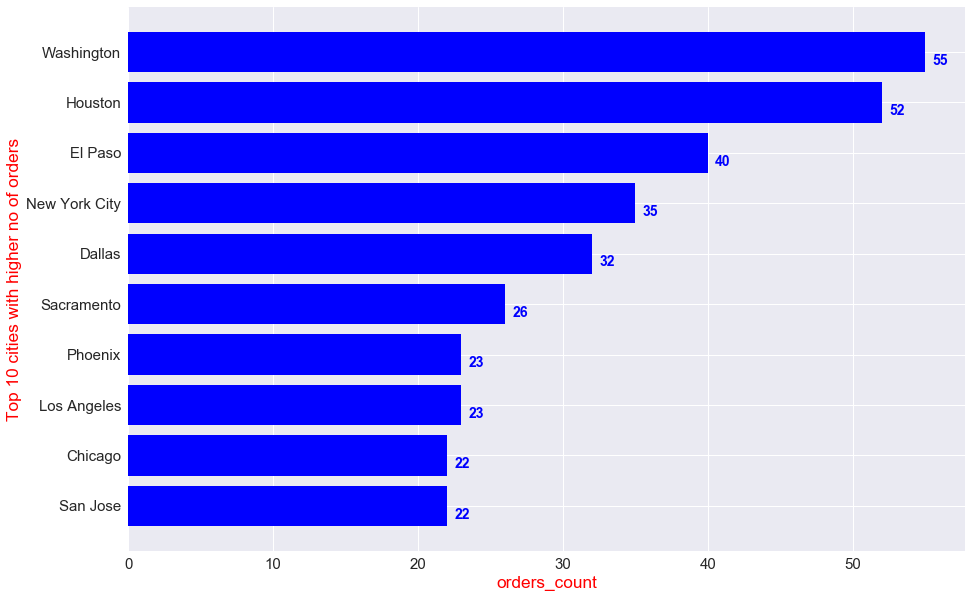

In [76]:
plt.figure(figsize=(15,10))
plt.barh(bottom= np.arange(0, 10), width= city_df['orders_count'].values[:10], tick_label = city_df['city_name'].values[:10], color = 'blue')
plt.xlabel('orders_count', fontsize = 'xx-large', color = 'red')
plt.ylabel('Top 10 cities with higher no of orders', fontsize = 'xx-large', color = 'red')
plt.tick_params(labelsize =15.0)
ax = plt.gca()
ax.invert_yaxis()
for i, v in enumerate(city_df['orders_count'].values[:10]):
    ax.text(v + 0.5 , i + .25, str(v), fontsize = 14, color='blue', fontweight='bold')

## Tracking the revenue of grocery store by month in 2017

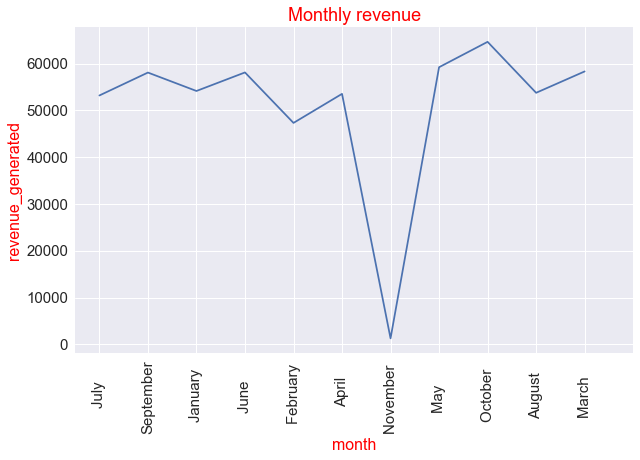

In [156]:
e = f.execute("select to_char(to_date(ORDER_DATE, 'DD-MM-YYYY'), 'Month') AS month_ , sum(TOTAL_PRICE) "
               "from (select ORDER_DATE, TOTAL_PRICE "
                "from orders o, payment P "
                "WHERE o.ORDER_ID = P.order_ID and order_date > TO_DATE('31/12/16', 'DD/MM/YY')) "
                "group by to_char(to_date(ORDER_DATE, 'DD-MM-YYYY'), 'Month')")
all_rows = e.fetchall()
revenue_dict = {}
for i, row in enumerate(all_rows):
    revenue_dict[i] = list(row)
revenue_df = pd.DataFrame(revenue_dict)
revenue_df = revenue_df.transpose()
revenue_df.columns = ['month', 'revenue_generated']
revenue_df.head()

plt.figure(figsize=(10, 6))
plt.title('Monthly revenue', color = 'red', size = 18)
plt.plot(revenue_df['revenue_generated'].values)
plt.xticks(np.arange(12), revenue_df.month.values.tolist(), size = 15, rotation = 'vertical')
plt.yticks(size= 15)
plt.xlabel('month', color = 'red', size = 16)
plt.ylabel('revenue_generated', size = 16, color ='red')

In [119]:
e  =f.execute("select to_char(to_date(ORDER_DATE, 'DD-MM-YYYY'), 'Month') AS ORDERED_MONTH, SUM(TOTAL_PRICE) AS REVENUE "
             "FROM (select o.order_date, TOTAL_PRICE "
             "from orders o, payment p "
              "where o.order_id = p.order_id and o.order_date > '31-12-16') "
            "GROUP BY to_char(to_date(ORDER_DATE, 'DD-MM-YYYY'), 'Month')")

revenue_dict = {}
for i, row in enumerate(all_rows):
    revenue_dict[i] = list(row)
revenue_df = pd.DataFrame(city_dict)
revenue_df =  revenue_df.transpose()

DatabaseError: ORA-01843: not a valid month

In [7]:
z =f.execute('SELECT CARD_TYPE, COUNT(*) FROM PAYMENT GROUP BY CARD_TYPE ORDER BY COUNT(*) DESC')
all_rows = z.fetchall()
card_dict = {}
for i, row in enumerate(all_rows):
    card_dict[i] = list(row)
card_df = pd.DataFrame(card_dict)
card_df = card_df.transpose()
card_df.columns = ['card_type', 'count']
card_df.sort_values(by ='count', ascending = False, inplace = True)
card_df.head(10)


,card_type,count
0,jcb,1071
1,mastercard,192
2,switch,140
3,maestro,137
4,americanexpress,117
5,visa-electron,116
6,bankcard,106
7,diners-club-enroute,95
8,china-unionpay,93
9,visa,62


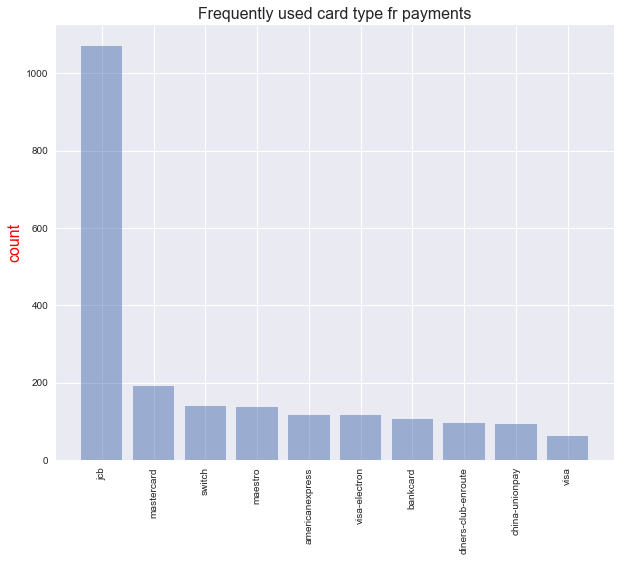

In [13]:
objects = card_df['card_type'].values.tolist()[:10]
y_pos = np.arange(0, 10)
performance = card_df['count'].values.tolist()[:10]
plt.figure(figsize =(10, 8))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 'vertical')
plt.ylabel('count', color = 'red', size = 16)
plt.title('Frequently used card type fr payments', size = 16)
 
plt.show()

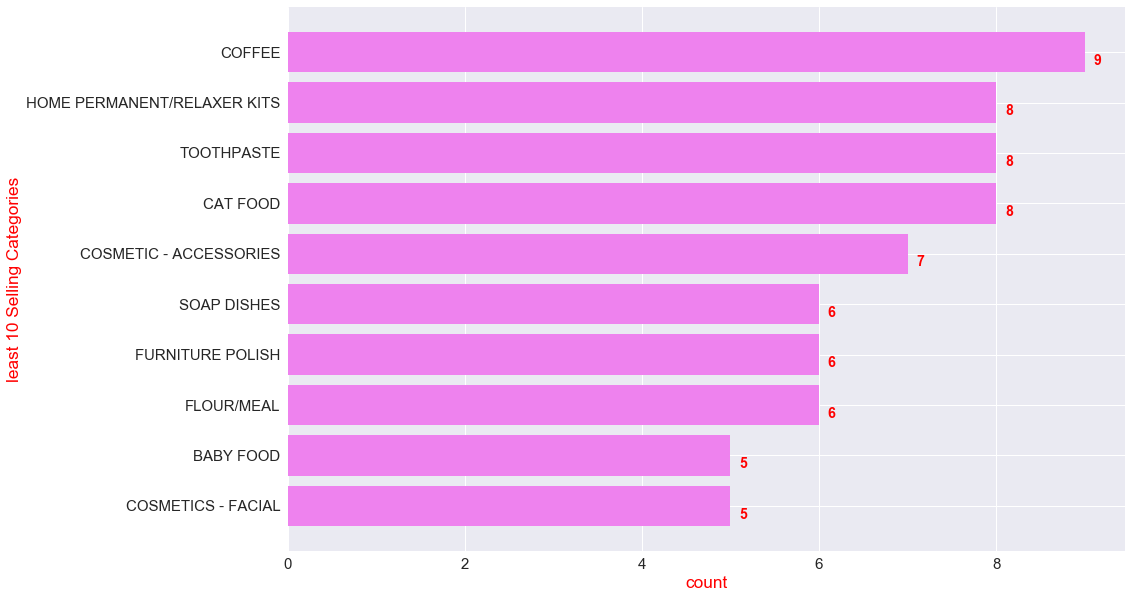

In [105]:
plt.figure(figsize=(15,10))
plt.barh(bottom= np.arange(0, 10), width= cat_df['count'].values[-10:], tick_label = cat_df['category_name'].values[-10:], color = 'violet')
plt.xlabel('count', fontsize = 'xx-large', color = 'red')
plt.ylabel('least 10 Selling Categories', fontsize = 'xx-large', color = 'red')
plt.tick_params(labelsize =15.0)
ax = plt.gca()
ax.invert_yaxis()
for i, v in enumerate(cat_df['count'].values[-10:]):
    ax.text(v+0.1  , i + .25, str(v), fontsize = 14, color='RED', fontweight='bold')